# Aplicando *AutoML* para classificação de saúde fetal

A redução da mortalidade infantil está refletida em vários Objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador chave do progresso humano.
A ONU espera que, até 2030, os países acabem com as mortes evitáveis ​​de recém-nascidos e crianças menores de 5 anos de idade, com todos os países visando reduzir a mortalidade de menores de 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Paralela à noção de mortalidade infantil está, naturalmente, a mortalidade materna, que é responsável por 295.000 mortes durante e após a gravidez e o parto (em 2017). A grande maioria dessas mortes (94%) ocorreu em locais com poucos recursos e a maioria poderia ter sido evitada.

Diante do exposto, os Cardiotocogramas (CTGs) são uma opção simples e de baixo custo para avaliação da saúde fetal, permitindo aos profissionais de saúde atuarem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

## Dados

As variáveis da base de dados são :

1) **baseline value** : Frequência cardíaca fetal basal (FHR);

2) **accelerations**: Número de acelerações por segundo;

3) **fetal_movement**: Número de movimentos fetais por segundo;

4) **uterine_contractions**: Número de contrações uterinas por segundo;

5) **light_decelerations**: Número de LDs por segundo;

6) **severe_decelerations**: Número de SDs por segundo;

7) **prolongued_decelerations**: Número de PDs por segundo;

8) **abnormal_short_term_variability**: Porcentagem de tempo com variabilidade anormal de curto prazo;

9) **mean_value_of_short_term_variability**: Valor médio da variabilidade de curto prazo;

10) **percentage_of_time_with_abnormal_long_term_variability**: Porcentagem de tempo com variabilidade anormal de longo prazo;

11) **mean_value_of_long_term_variability**: Valor médio da variabilidade de longo prazo;

12) **histogram_width**: Largura do histograma feito usando todos os valores de um registro;

13) **histogram_min**: Valor mínimo do histograma;

14) **histogram_max**: Valor máximo do histograma;

15) **histogram_number_of_peaks**: Número de picos no histograma do exame;

16) **histogram_number_of_zeroes**: Número de zeros no histograma do exame;

17) **histogram_mode**: Moda histograma;

18) **histogram_mean**: Média histagrama;

19) **histogram_median**: mediana histograma;

20) **histogram_variance**: Variação histórica;

21) **histogram_tendency**: Tendência do histograma;

22) **fetal_health**: Saúde fetal(1 - Normal, 2 - Suspeito, 3 - Patológico).

Este conjunto de dados contém 2.126 registros de características extraídas de exames de cardiotocograma.

## Instalando a biblioteca *Pycaret*

In [1]:
pip install pycaret

     |████████████████████████████████| 256kB 4.3MB/s 
     |████████████████████████████████| 1.8MB 17.8MB/s 
     |████████████████████████████████| 245kB 32.6MB/s 
     |████████████████████████████████| 174kB 36.1MB/s 
     |████████████████████████████████| 157.5MB 39kB/s 
     |████████████████████████████████| 6.8MB 42.0MB/s 
     |████████████████████████████████| 14.2MB 34.5MB/s 
     |████████████████████████████████| 276kB 47.1MB/s 
     |████████████████████████████████| 1.6MB 50.1MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 65.8MB 139kB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 3.1MB 39.8MB/s 
     |████████████████████████████████| 604kB 43.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
   

## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

## Importando a base de dados

In [3]:
fetal = pd.read_csv('fetal_health.csv')

## Analisando a base de dados

Primeiras linhas da base de dados.

In [4]:
fetal.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


Últimas 10 linhas da base de dados.

In [5]:
fetal.tail(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2116,140.0,0.004,0.000,0.004,0.000,0.0,0.0,80.0,0.2,36.0,2.2,18.0,140.0,158.0,1.0,0.0,147.0,148.0,149.0,1.0,0.0,1.0
2117,140.0,0.000,0.000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,8.5,26.0,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1.0
2118,140.0,0.000,0.000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,7.0,21.0,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1.0
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,6.4,26.0,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,6.0,31.0,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.000,0.0,0.0,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


Valores faltantes

In [6]:
fetal.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Tebala com as estatísticas descritivas da base de dados.

In [7]:
fetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Informações sobre a base de dados.

In [8]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Análise Exploratória dos dados

Irei analisar cada *feature* em relação a variável *target*.

Primeiramente irei analisar a variável *target* que é a de saúde fetal e já podemos perceber que as classes estão desbalanceadas e talvez seja necessário realizar um rebalanceamento dessas classes para não termos problemas no treinamento dos modelos.

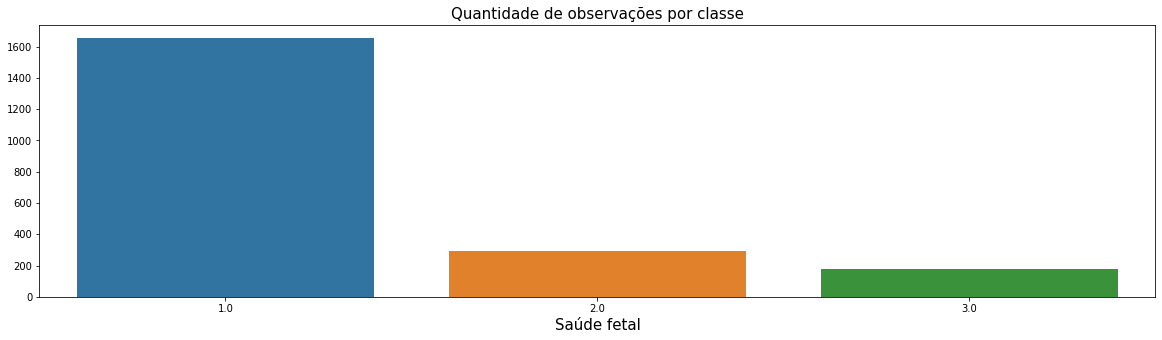

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(fetal['fetal_health'])
plt.title('Quantidade de observações por classe',size=15)
plt.xlabel('Saúde fetal',size=15)
plt.ylabel('');

### *Boxplot* das variáveis

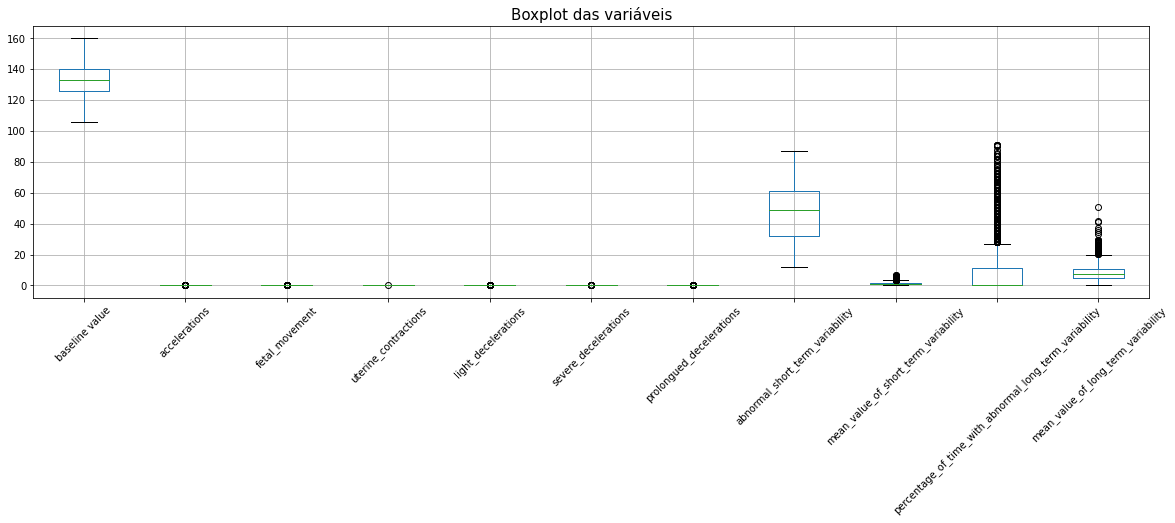

In [10]:
fetal[['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations','prolongued_decelerations',
      'abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
      'mean_value_of_long_term_variability']].boxplot(figsize=(20,5))
plt.xticks(rotation = 45)
plt.title('Boxplot das variáveis',size=15);

### Histograma das variáveis

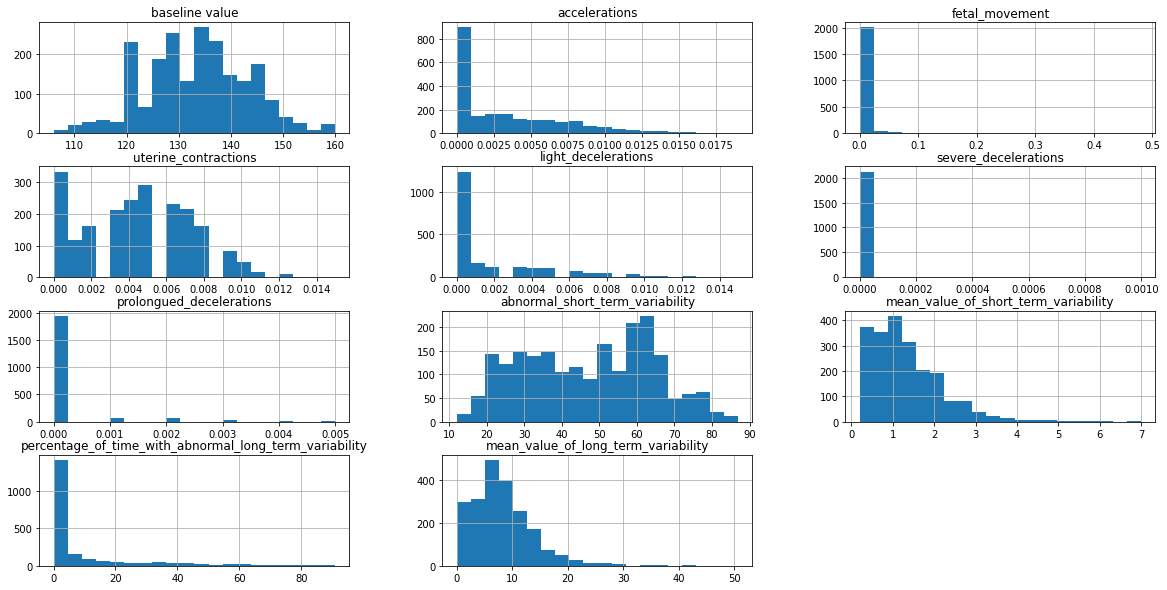

In [19]:
fetal[['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations','prolongued_decelerations',
      'abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
      'mean_value_of_long_term_variability']].hist(figsize=(20,10),bins=20)
plt.title('Histograma das variáveis',size=15);

Abaixo podemos ver algo interessante: os fetos que são classificados como suspeitos possuem uma Frequência cardíaca fetal basal média maior, enquanto em média, aqueles que são classificados como normais e patológicos possuem uma frequência cardíaca média similar.

In [12]:
fetal.groupby(['fetal_health']).mean()['baseline value']

fetal_health
1.0    131.981873
2.0    141.684746
3.0    131.687500
Name: baseline value, dtype: float64

Na *feature* *acceleration* (ou número de acelerações por segundo) os fetos classificados como patológicos, possuem o menor número de acelerações cardíacas por segundo.

In [13]:
fetal.groupby(['fetal_health']).mean()['accelerations']

fetal_health
1.0    0.003992
2.0    0.000275
3.0    0.000392
Name: accelerations, dtype: float64

Já na *feature* *fetal_movement* o núméro médio de movimentos fetais, dos classificados como patológicos são maiores que as outras classes. Enquanto os fetos com alguma cardiopatologia tem acelerações médias por segundo a taxa menores, a quantidade de movimentos feitos no útero é maior.

In [14]:
fetal.groupby(['fetal_health']).mean()['fetal_movement']

fetal_health
1.0    0.007963
2.0    0.008332
3.0    0.025676
Name: fetal_movement, dtype: float64

Fetos com suspeitas de alguma cardiopatologia são os que registram um número médio de contrações menor que as outras classes. Fetos normais registram uma média de contrações maior.

In [15]:
fetal.groupby(['fetal_health']).mean()['uterine_contractions']

fetal_health
1.0    0.004781
2.0    0.002390
3.0    0.003784
Name: uterine_contractions, dtype: float64

Para as *fetaure* *light_decelerations, severe_decelerations* e *prolongued_decelerations*, fetos classificados com alguma patologia possuem valores médios maiores em todas essas variáveis, enquanto que os classificados como casos suspeitos possuem os menores valores médios.

In [16]:
print('Variáveis de desaceleração cardíaca')
print(" "*127)
print(fetal.groupby(['fetal_health']).mean()['light_decelerations'])
print(" "*127)
print(fetal.groupby(['fetal_health']).mean()['severe_decelerations'])
print(" "*127)
print(fetal.groupby(['fetal_health']).mean()['prolongued_decelerations'])

Variáveis de desaceleração cardíaca
                                                                                                                               
fetal_health
1.0    0.001941
2.0    0.000536
3.0    0.003670
Name: light_decelerations, dtype: float64
                                                                                                                               
fetal_health
1.0    6.042296e-07
2.0    0.000000e+00
3.0    3.409091e-05
Name: severe_decelerations, dtype: float64
                                                                                                                               
fetal_health
1.0    0.000051
2.0    0.000095
3.0    0.001273
Name: prolongued_decelerations, dtype: float64


Em Porcentagem de tempo com variabilidade anormal de curto prazo, os fetos classificados com alguma patologia possuem um percentual maior, seguido dos fetos classificados como suspeitos (os valores são bem próximos).

In [17]:
fetal.groupby(['fetal_health']).mean()['abnormal_short_term_variability']

fetal_health
1.0    42.465861
2.0    61.901695
3.0    64.539773
Name: abnormal_short_term_variability, dtype: float64

Fetos considerados com alguma patologia possuem um valor médio maior na *feature* *mean value of short term variability*.

In [40]:
fetal.groupby(['fetal_health']).mean()['mean_value_of_short_term_variability']

fetal_health
1.0    1.430634
2.0    0.638983
3.0    1.575568
Name: mean_value_of_short_term_variability, dtype: float64

Abaixo segue uma série de *scatter plots* onde relaciono as variáveis analisadas anteriormente com as *features* derivadas do exame histograma de fases.

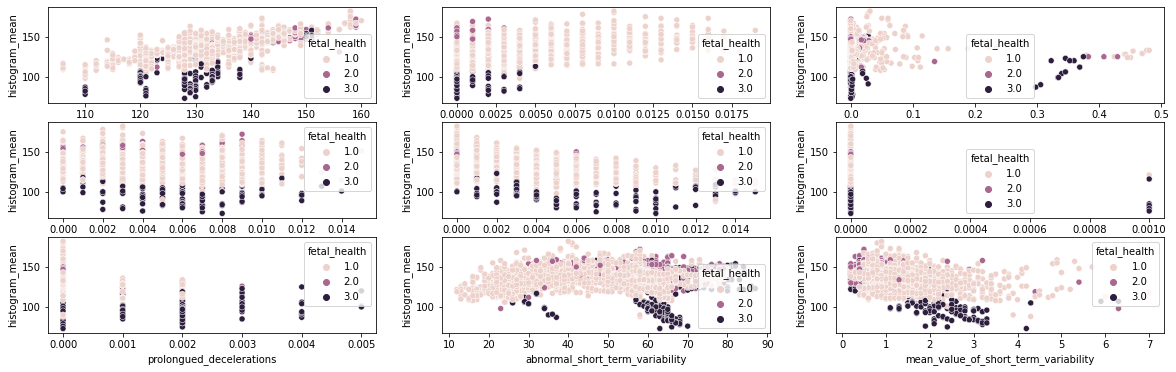

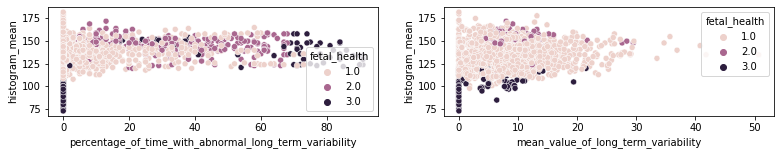

In [28]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_mean',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_mean',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_mean',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_mean',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_mean',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_mean',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_mean',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_mean',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_mean',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_mean',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_mean',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

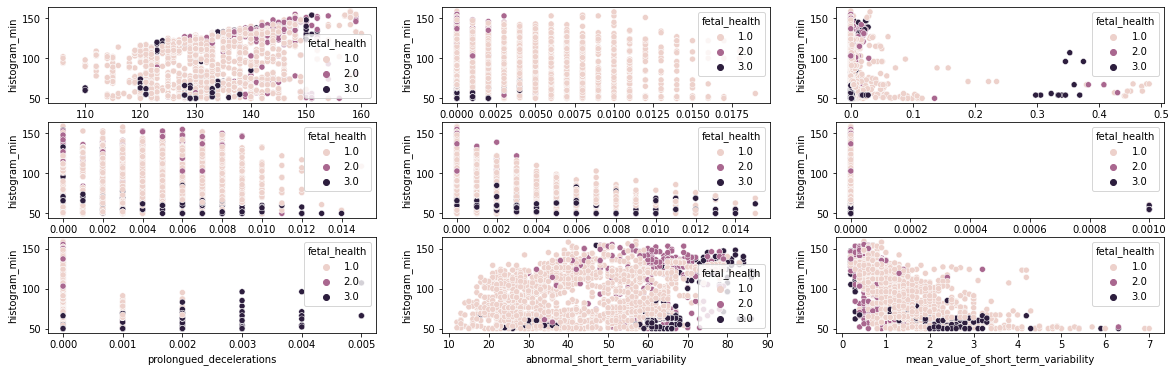

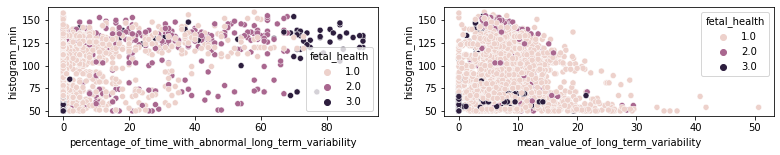

In [29]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_min',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_min',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_min',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_min',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_min',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_min',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_min',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_min',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_min',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_min',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_min',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

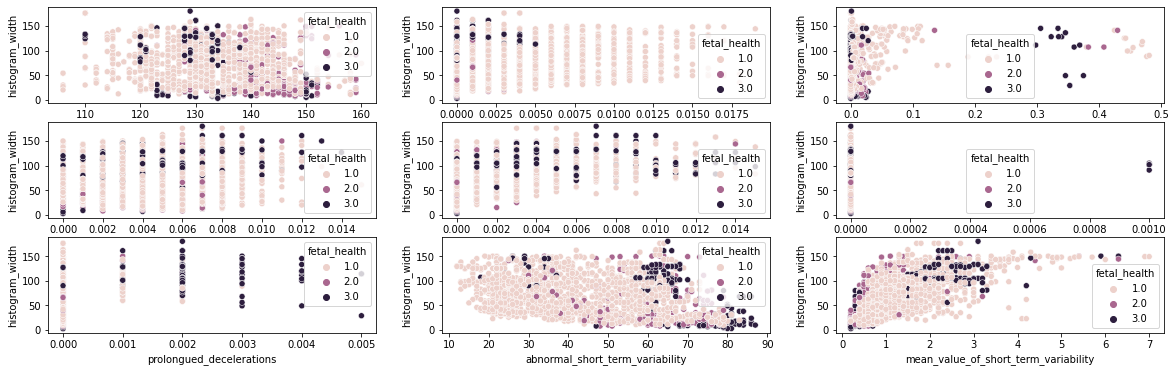

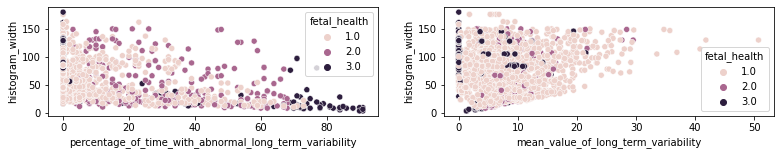

In [31]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_width',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_width',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_width',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_width',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_width',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_width',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_width',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_width',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_width',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_width',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_width',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

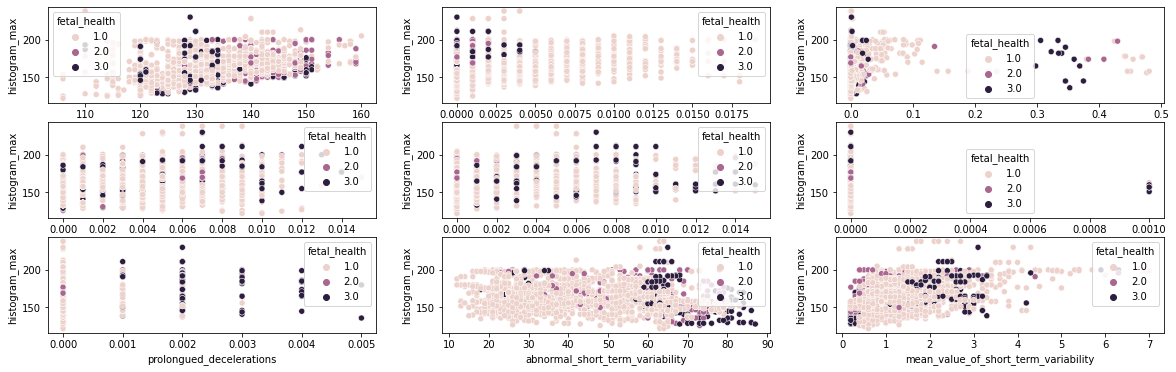

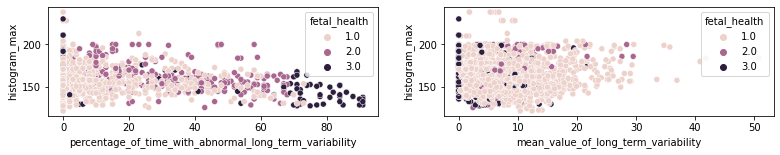

In [32]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_max',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_max',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_max',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_max',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_max',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_max',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_max',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_max',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_max',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_max',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_max',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

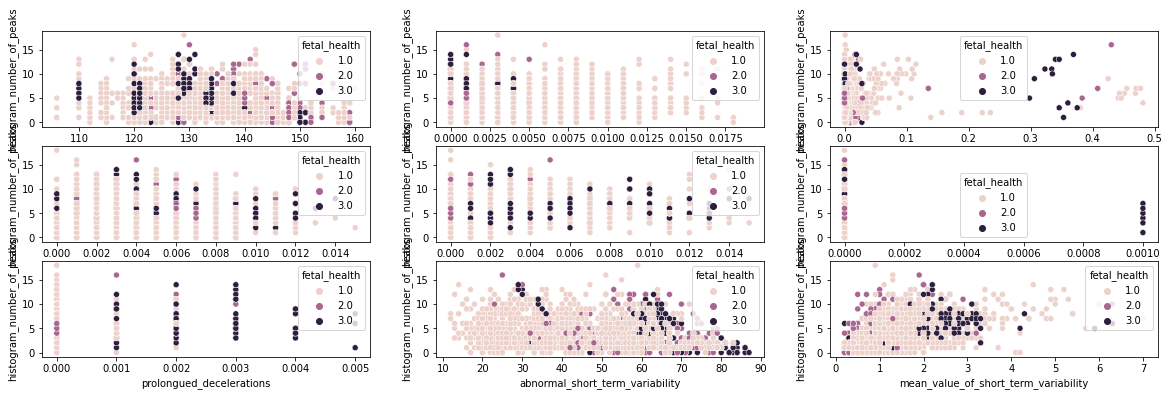

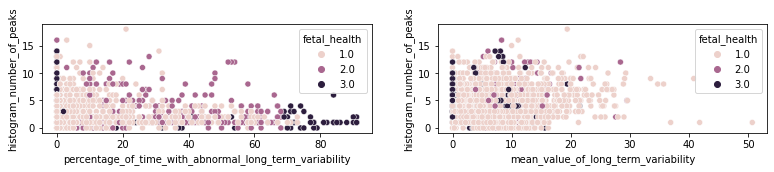

In [33]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_number_of_peaks',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_number_of_peaks',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_number_of_peaks',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_number_of_peaks',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_number_of_peaks',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_number_of_peaks',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_number_of_peaks',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_number_of_peaks',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_number_of_peaks',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_number_of_peaks',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_number_of_peaks',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

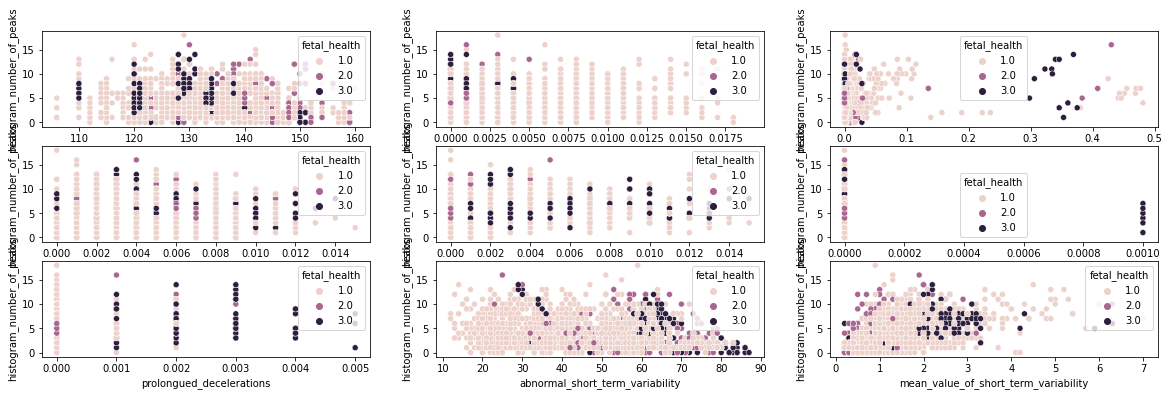

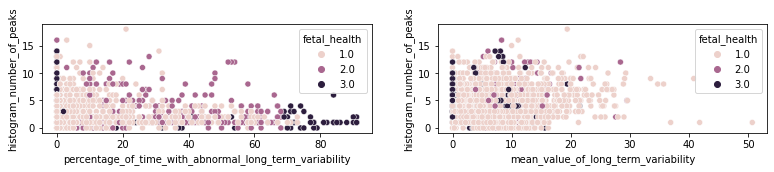

In [34]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_number_of_peaks',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_number_of_peaks',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_number_of_peaks',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_number_of_peaks',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_number_of_peaks',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_number_of_peaks',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_number_of_peaks',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_number_of_peaks',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_number_of_peaks',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_number_of_peaks',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_number_of_peaks',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

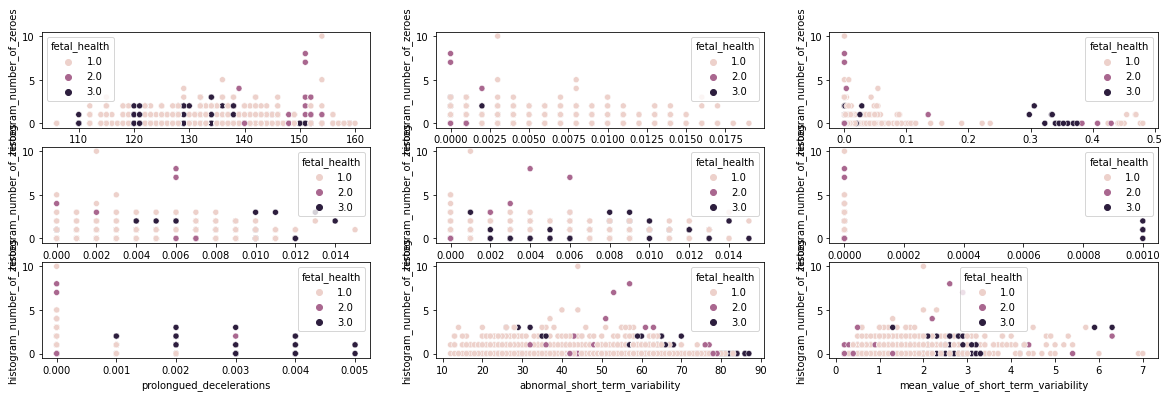

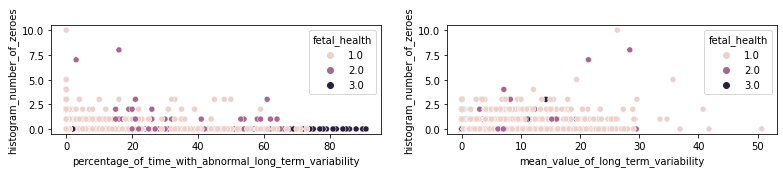

In [35]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_number_of_zeroes',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_number_of_zeroes',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_number_of_zeroes',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_number_of_zeroes',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_number_of_zeroes',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_number_of_zeroes',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_number_of_zeroes',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_number_of_zeroes',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_number_of_zeroes',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_number_of_zeroes',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_number_of_zeroes',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

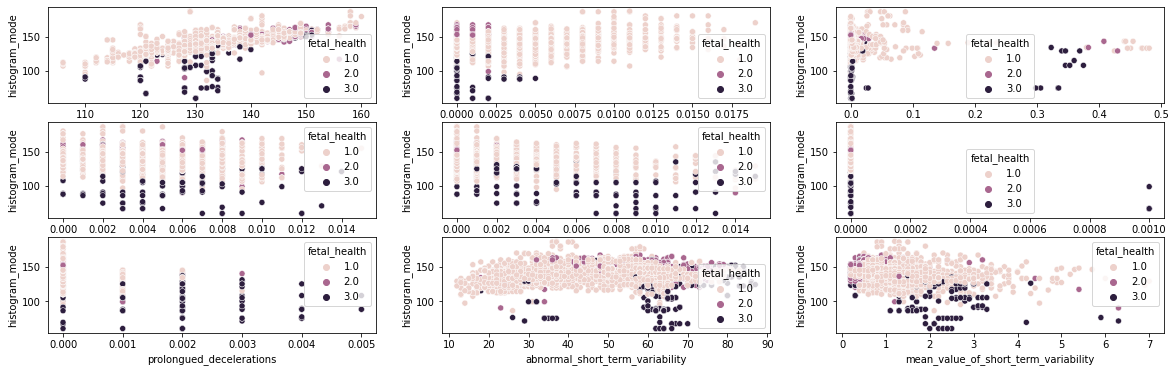

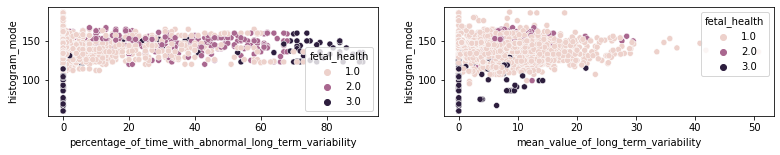

In [36]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_mode',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_mode',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_mode',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_mode',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_mode',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_mode',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_mode',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_mode',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_mode',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_mode',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_mode',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

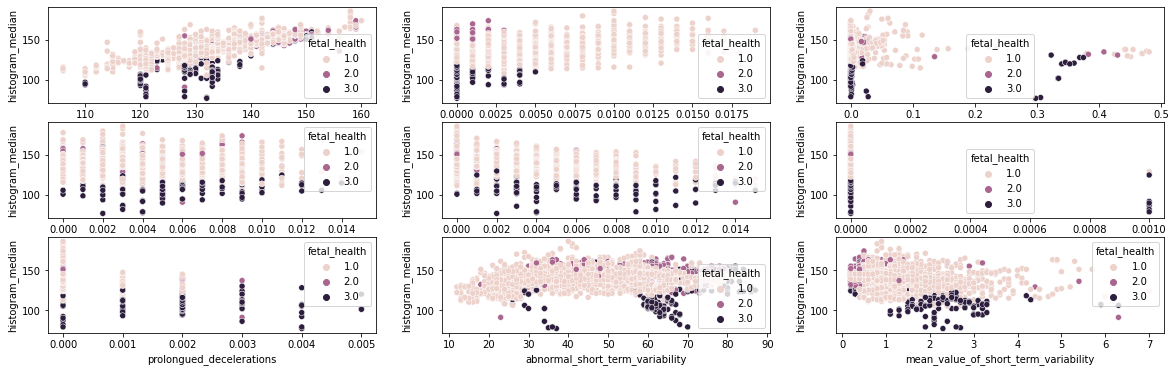

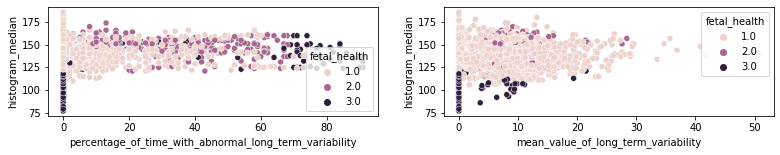

In [37]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_median',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_median',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_median',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_median',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_median',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_median',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_median',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_median',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_median',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_median',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_median',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

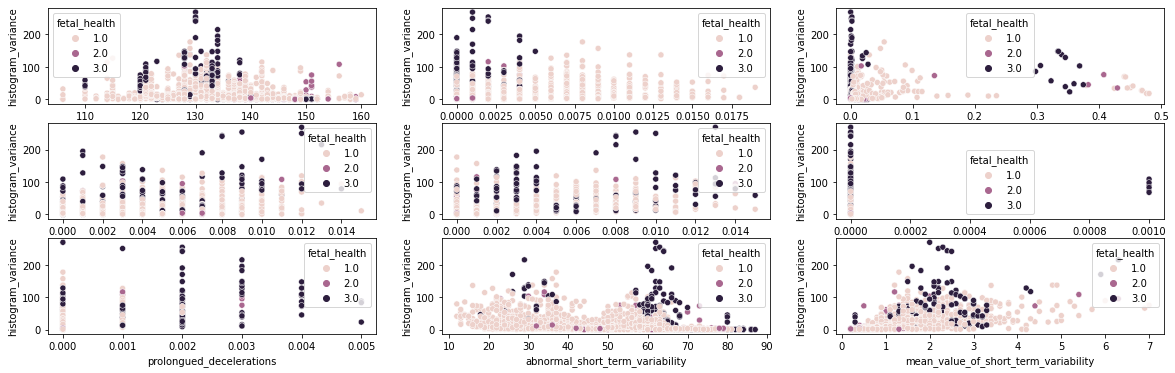

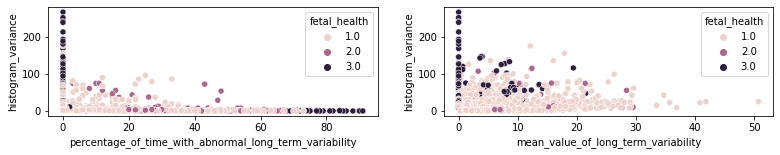

In [38]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_variance',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_variance',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_variance',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_variance',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_variance',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_variance',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_variance',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_variance',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_variance',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_variance',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_variance',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

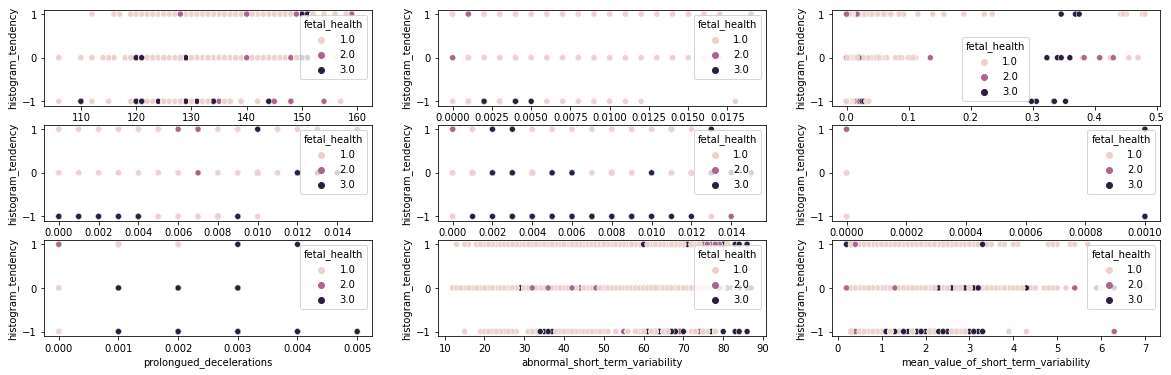

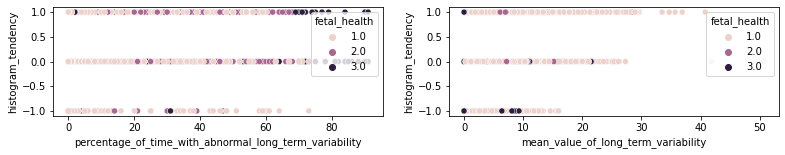

In [39]:
fig, ax = plt.subplots(3,3,figsize=(20,6))
sns.scatterplot(y='histogram_tendency',x='baseline value',data=fetal, hue = 'fetal_health',ax=ax[0][0])
sns.scatterplot(y='histogram_tendency',x='accelerations',data=fetal, hue = 'fetal_health',ax=ax[0][1])
sns.scatterplot(y='histogram_tendency',x='fetal_movement',data=fetal, hue = 'fetal_health',ax=ax[0][2])
sns.scatterplot(y='histogram_tendency',x='uterine_contractions',data=fetal, hue = 'fetal_health',ax=ax[1][0])
sns.scatterplot(y='histogram_tendency',x='light_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][1])
sns.scatterplot(y='histogram_tendency',x='severe_decelerations',data=fetal, hue = 'fetal_health',ax=ax[1][2])
sns.scatterplot(y='histogram_tendency',x='prolongued_decelerations',data=fetal, hue = 'fetal_health',ax=ax[2][0])
sns.scatterplot(y='histogram_tendency',x='abnormal_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][1])
sns.scatterplot(y='histogram_tendency',x='mean_value_of_short_term_variability',data=fetal, hue = 'fetal_health',ax=ax[2][2])

fig, ax = plt.subplots(1,2,figsize=(13,2))
sns.scatterplot(y='histogram_tendency',x='percentage_of_time_with_abnormal_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[0])
sns.scatterplot(y='histogram_tendency',x='mean_value_of_long_term_variability',data=fetal, hue = 'fetal_health',ax=ax[1]);

## Separando os dados de treino/teste e validação

Irei separar uma parte dos dados para treinar e testar os algoritmos de *machine learning* que serão treinados e outra parte da base de dados será usada para validação do modelo, ou seja, é uma parte dos dados que o modelo não irá ter contato.

In [ ]:
dados = fetal.sample(frac = 0.9,random_state=42)
dados_n = fetal.drop(dados.index)

Dimensões da base de dados.

In [ ]:
print(dados_n.shape)
print(dados.shape)

(213, 22)
(1913, 22)


Agora irei agora reindexar as base de dados que foram separadas.

In [ ]:
dados.reset_index(drop=True,inplace=True)
dados_n.reset_index(drop=True, inplace=True)

## Configuração da base de dados

Nessa etapa irei definir qual a base de dados e qual a variável *target* ou alvo do treinamento dos modelos. Posso criar vários tipos de confifurações, mas usarei as que já estão padronizadas para o treinamento e teste.

In [ ]:
mult_fetal = setup(data=fetal, target = 'fetal_health',session_id=123)

,Description,Value
0,session_id,123
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2126, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Treinamento dos modelos de com *AutoML*

Agora irei treinar todos os modelos e serão geradas as métricas de classificação para cada um dos modelos e será avaliado qual o melhor modelo.

Conforme as métricas de avaliação o melhor modelo foi o *CatBoost Classifier*.

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9543,0.9849,0.9039,0.9545,0.9529,0.8713,0.8734,5.056
xgboost,Extreme Gradient Boosting,0.9476,0.9853,0.8984,0.9482,0.9463,0.8539,0.8560,2.469
lightgbm,Light Gradient Boosting Machine,0.9469,0.9859,0.8994,0.9477,0.9462,0.8531,0.8545,0.263
gbc,Gradient Boosting Classifier,0.9449,0.9793,0.8897,0.9455,0.9435,0.8456,0.8480,1.000
rf,Random Forest Classifier,0.9429,0.9869,0.8735,0.9425,0.9404,0.8364,0.8401,0.570
et,Extra Trees Classifier,0.9254,0.9833,0.8268,0.9235,0.9216,0.7832,0.7880,0.520
dt,Decision Tree Classifier,0.9180,0.8861,0.8590,0.9185,0.9173,0.7751,0.7761,0.028
knn,K Neighbors Classifier,0.8924,0.9195,0.7597,0.8869,0.8867,0.6838,0.6903,0.126
ada,Ada Boost Classifier,0.8851,0.8656,0.7977,0.8889,0.8838,0.6818,0.6862,0.164
lr,Logistic Regression,0.8817,0.9281,0.7459,0.8753,0.8747,0.6553,0.6621,0.992


Irei treinar novamente, mas dessa vez irei selecionar os três melhores modelos.

In [ ]:
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9543,0.9849,0.9039,0.9545,0.9529,0.8713,0.8734,5.092
xgboost,Extreme Gradient Boosting,0.9476,0.9853,0.8984,0.9482,0.9463,0.8539,0.8560,4.719
lightgbm,Light Gradient Boosting Machine,0.9469,0.9859,0.8994,0.9477,0.9462,0.8531,0.8545,0.263
gbc,Gradient Boosting Classifier,0.9449,0.9793,0.8897,0.9455,0.9435,0.8456,0.8480,1.014
rf,Random Forest Classifier,0.9429,0.9869,0.8735,0.9425,0.9404,0.8364,0.8401,0.570
et,Extra Trees Classifier,0.9254,0.9833,0.8268,0.9235,0.9216,0.7832,0.7880,0.507
dt,Decision Tree Classifier,0.9180,0.8861,0.8590,0.9185,0.9173,0.7751,0.7761,0.030
knn,K Neighbors Classifier,0.8924,0.9195,0.7597,0.8869,0.8867,0.6838,0.6903,0.129
ada,Ada Boost Classifier,0.8851,0.8656,0.7977,0.8889,0.8838,0.6818,0.6862,0.165
lr,Logistic Regression,0.8817,0.9281,0.7459,0.8753,0.8747,0.6553,0.6621,0.705


## Criando o modelo

Agora irei criar o modelo que obteve o melhor desempenho nas métricas e, além disso, será feita a valiação cruzada desse modelo.

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9664,0.9955,0.9336,0.9660,0.9654,0.9054,0.9071
1,0.9664,0.9953,0.9217,0.9661,0.9660,0.9064,0.9071
2,0.9463,0.9701,0.8860,0.9491,0.9424,0.8431,0.8507
3,0.9732,0.9925,0.9495,0.9731,0.9727,0.9262,0.9266
4,0.9262,0.9704,0.8276,0.9239,0.9227,0.7867,0.7910
5,0.9597,0.9893,0.9070,0.9608,0.9596,0.8889,0.8893
6,0.9732,0.9930,0.9257,0.9739,0.9728,0.9259,0.9264
7,0.9396,0.9730,0.8972,0.9411,0.9402,0.8355,0.8356
8,0.9459,0.9859,0.8910,0.9457,0.9423,0.8446,0.8498
9,0.9459,0.9838,0.9000,0.9451,0.9452,0.8502,0.8509


In [ ]:
print(catboost)

### *Tunning* do modelo

Irei realizar o procedimento de combinação de vários parâmetros do modelo e observar se há alguma melhora no processo de *cross validation*. Pode-se ver abaixo que o desempenho do modelo *tunado* foi inferior ao do modelo original, sendo assim ficarei com o modelo original.

In [ ]:
tunned_cat = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9463,0.9872,0.8860,0.9459,0.9425,0.8430,0.8497
1,0.9396,0.9924,0.8333,0.9404,0.9354,0.8183,0.8295
2,0.9262,0.9650,0.8384,0.9260,0.9175,0.7756,0.7910
3,0.9597,0.9867,0.9189,0.9592,0.9594,0.8892,0.8893
4,0.9262,0.9613,0.8276,0.9296,0.9226,0.7813,0.7901
5,0.9463,0.9728,0.8741,0.9486,0.9436,0.8430,0.8497
6,0.9664,0.9832,0.8979,0.9674,0.9654,0.9062,0.9074
7,0.9329,0.9704,0.8814,0.9318,0.9323,0.8153,0.8154
8,0.9122,0.9754,0.8369,0.9087,0.9089,0.7468,0.7505
9,0.9324,0.9866,0.8683,0.9308,0.9302,0.8082,0.8110


### Matriz de confusão

Abaixo pode-se ver os resultados do modelo por classe, visualizando a diagonal principal da matriz abaixo. Como de se esperar a classe com melhor desempenho foi a classe 1, porém as classes 2 e 3 tiveram bons desempenhos.

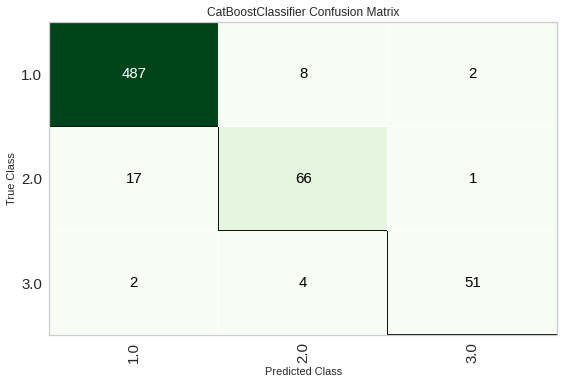

In [ ]:
plot_model(catboost, plot='confusion_matrix')

### Relatório das métricas de avaliação

A três métricas de avaliação são a **precisão**, o **recall** e o **f1-score**. Mesmo com o desbalanceamento das classes obteveram-se bons resultados para a classe 1 e a classe 3, em relação a precisão e ao *recall*.

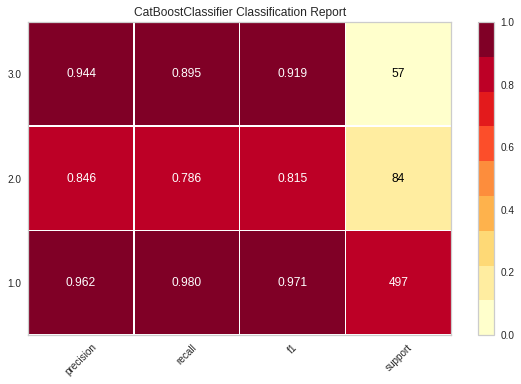

In [ ]:
plot_model(catboost, plot='class_report')

### Parâmetros do modelo *CatBoost*

In [ ]:
plot_model(catboost, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,MultiClass
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


### *Decision Boundary*

No gráfico abaixo podems ver como foi o processo de decisão do algoritmo em classificar as observações.

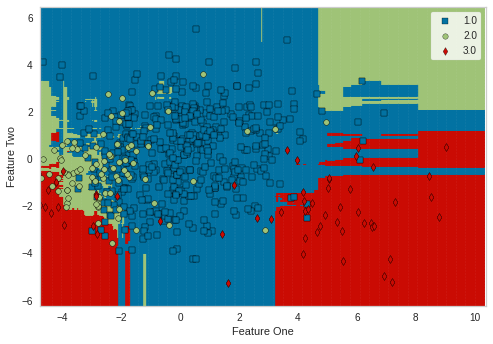

In [ ]:
plot_model(catboost, plot='boundary')

### Gráfico de erros

Abaixo podemos ver os erros cometidos pelo modelo: a maioria dos erros estão nas classes 1 e 2.

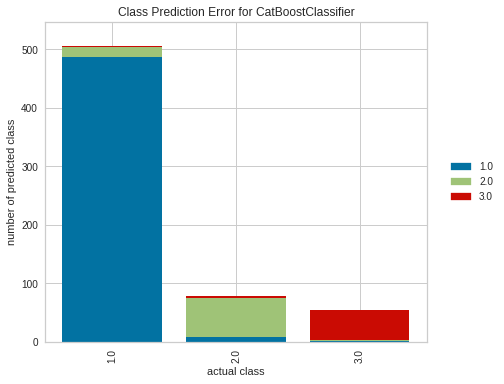

In [ ]:
plot_model(catboost, plot='error')

### Gráfico da Curva ROC e AUC

Nesse gráfico pode-se observar o desempenho do modelo para cada classe comparando as taxas de verdadeiro positivos e Falso positivos. Quanto mais próximo de 1, melhor o desempenho do modelo e no caso do modelo *CatBoost Classifier* tivemos, respectivamente, para as classes 1,2 e 3 os valores 0.99, 0.98 e 1, resultados muito satisfatórios.

Outras métricas que podem ser vistas no gráfico é a *Micro-average ROC curve* (que seria a contribuição de cada classe para calcular a média dos resultados, que para esse caso é a curva ROC) e a *Macro-average ROC curve* (que seria a média de cada resultado individual); e para o modelo *CatBoost* foram de 0.99, um resultado muito elevado.

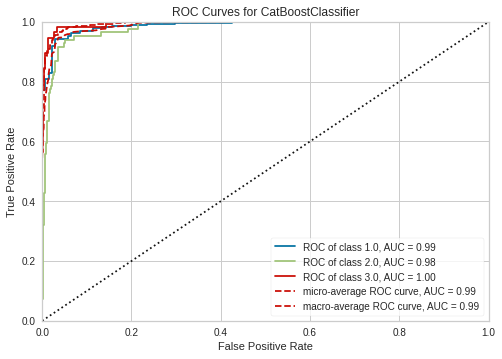

In [ ]:
plot_model(catboost, plot='auc')

### *Precision-Recall Curve*

Analisa o *tradeoff* entre precisão e *recall*, ou seja, quanto de uma métrica pode ser sacrificada para a melhoria da outra. Existem vários limites que podem ser usados para balancear essas métricas. Abaixo o ideal é que essas métricas retornem resultados altos, como é o nosso caso.

Vemos que a *Average precision* é de 0.99, muito alta e com isso podemos concluir o bom desempenho do modelo *catBoost Classifier*.


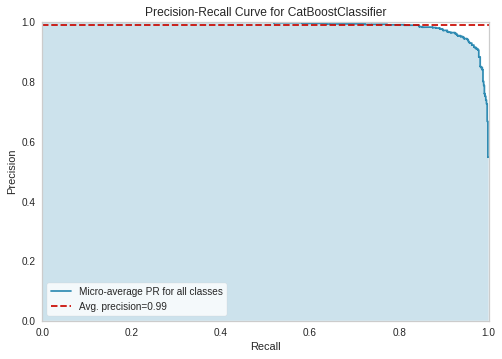

In [ ]:
plot_model(catboost, plot='pr')

### Gráfico *RadViz*

Esse gráfico é usado para visualizar a separabilidade entre as classes, inserindo dentro de uma circunferência cada dimensão dos recursos, que no nosso caso foram 5 *features*.

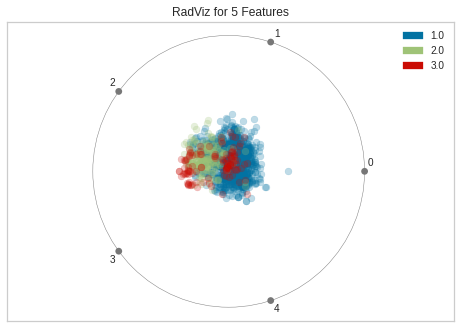

In [ ]:
plot_model(catboost, plot='dimension')

### *Feature Importance*

Abaixo podemos ver quais as *fetaures* mais importantes para o processo de classificação. Então ao invés de termos 21 *features* temos 10 *features* que foram mais relevantes para as previsões realizadas pelo modelo. Algo que poderia ser feito é treinar o modelos apenas com essas variáveis.

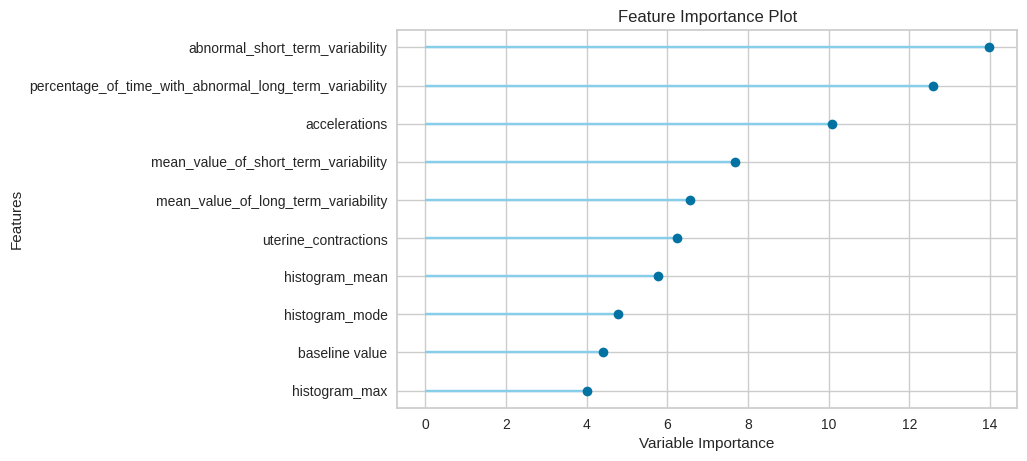

In [ ]:
plot_model(catboost, plot='feature')

## Seria possível melhorar esse modelo ?

Dado que esse modelo foi o melhor, será que ele pode ser melhorado com a aplicação de outras técnicas ?

Uma das formas mais comuns de mehoria de modelos de apredizado de máquina é são os métodos *Ensembling*, principalmente se esses métodos são do tipo árvore. As técnicas mais usadas são *Bagging*, *Boosting*, *Blending* e o *Stacking*; e cada uma dessa será usada e será falado um pouco de cada uma a seguir.



### Método *Bagging*

Conforme Brilhadori, Melina, and Marcelo Lauretto (2013) em seu artigo *Estudo comparativo entre algoritmos de árvores de classificação e máquinas de vetores suporte, baseados em ensembles de classificadores* o método *Bagging* foi proposto por Breiman (1996) e 

"é um metaalgoritmo para construção de classificadores agregados. O método consiste em gerar subconjuntos de exemplos através de sorteio simples com reposição, sobre o conjunto de dados de treinamento original. Cada subconjunto amostrado é utilizado para a construção de um novo classificador. A classificação final é realizada por um sistema de votação, em usualmente se atribui para uma nova instância a classe com maior número de votos entre os classificadores. Uma vez que a classe prevista resulta da combinação das decisões individuais dos classificadores, demonstra-se que as previsões se tornam mais confiáveis à medida que se têm mais votos. Dessa forma, o método bagging aposta na expansão da quantidade de classificadores a fim de se reduzir a variância do conjunto, especialmente na presença de dados ruidosos".

No resultado abaixo vemos que os resultado médios do método *Bagging* não superaram o modelo original, então partirei para o próximo método.

In [ ]:
bagged_cat = ensemble_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9664,0.9954,0.9336,0.9660,0.9654,0.9054,0.9071
1,0.9597,0.9946,0.9059,0.9590,0.9588,0.8863,0.8878
2,0.9396,0.9716,0.8701,0.9432,0.9343,0.8213,0.8314
3,0.9732,0.9926,0.9495,0.9731,0.9727,0.9262,0.9266
4,0.9329,0.9720,0.8305,0.9359,0.9291,0.8012,0.8102
5,0.9530,0.9893,0.8781,0.9524,0.9516,0.8658,0.8684
6,0.9664,0.9926,0.8979,0.9683,0.9657,0.9073,0.9082
7,0.9329,0.9768,0.8814,0.9332,0.9329,0.8150,0.8152
8,0.9392,0.9838,0.8607,0.9390,0.9356,0.8228,0.8294
9,0.9527,0.9873,0.9029,0.9521,0.9518,0.8672,0.8686


Também é permitido variar o número de estimadores do método *bagging*, porém não realizarei esse procedimento, pois o processo ficará muito demorado.

In [ ]:
#bagged_cat2 = ensemble_model(catboost, n_estimators=50)

### Método *Boosting*

Ainda no artigo de Brilhadori, Melina, and Marcelo Lauretto (2013) eles falam 

"Combinar múltiplos classificadores ajuda quando estes apresentam diferenças entre si e quando cada um lida bem com uma parte do conjunto de dados, complementando-se, ao invés de duplicar um ao outro. O método boosting, proposto por Freund e Schapire (1996), explora esse conceito selecionando explicitamente modelos que se complementem. Embora se baseie em reamostragem dos dados do conjunto de treinamento, não adota a reamostragem uniforme. O processo de criação dos subconjuntos de treinamento os condiciona a serem dependentes dos desempenhos individuais de cada classificador".

Em relação ao modelo original, houve uma melhora nas métricas **AUC** e **recall**.


In [ ]:
boosted_cat = ensemble_model(catboost, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9664,0.9966,0.9336,0.9660,0.9654,0.9054,0.9071
1,0.9732,0.9968,0.9376,0.9733,0.9731,0.9260,0.9262
2,0.9396,0.9685,0.8831,0.9394,0.9359,0.8257,0.8308
3,0.9732,0.9922,0.9495,0.9731,0.9727,0.9262,0.9266
4,0.9195,0.9726,0.8117,0.9151,0.9151,0.7673,0.7715
5,0.9664,0.9910,0.8979,0.9683,0.9657,0.9073,0.9082
6,0.9799,0.9929,0.9416,0.9810,0.9796,0.9451,0.9456
7,0.9262,0.9775,0.8915,0.9316,0.9282,0.8035,0.8044
8,0.9459,0.9857,0.8910,0.9466,0.9426,0.8467,0.8508
9,0.9459,0.9780,0.9000,0.9451,0.9452,0.8502,0.8509


### Método *Blending*

Esse método é usado para combinar modelos diferentes do tipo árvore. Aqui irei usar o *Catboost Classifier*, o *LightGBM Classifier* e o *Extreme Boosting Classifier*.

In [ ]:
cat = create_model('catboost', verbose=False)
light = create_model('lightgbm', verbose=False)
xg = create_model('xgboost', verbose=False)

Em relação ao modelo original houve ligeiras melhoras nas métricas **AUC**, **Recall** e **Precisão**.

In [ ]:
blend = blend_models(estimator_list=[light,cat,xg], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9664,0.9955,0.9336,0.9660,0.9654,0.9054,0.9071
1,0.9732,0.9974,0.9376,0.9733,0.9731,0.9260,0.9262
2,0.9396,0.9676,0.8831,0.9394,0.9359,0.8257,0.8308
3,0.9732,0.9947,0.9495,0.9731,0.9727,0.9262,0.9266
4,0.9128,0.9726,0.7958,0.9099,0.9080,0.7516,0.7553
5,0.9664,0.9879,0.9347,0.9663,0.9663,0.9076,0.9078
6,0.9732,0.9926,0.9387,0.9756,0.9732,0.9276,0.9285
7,0.9195,0.9733,0.8886,0.9273,0.9223,0.7881,0.7897
8,0.9459,0.9880,0.8910,0.9457,0.9423,0.8446,0.8498
9,0.9527,0.9866,0.9159,0.9523,0.9524,0.8705,0.8707


### Método *Stacking*

Outra forma de combinar modelos diferentes e aqui usarei os modelos *top 3* que eu tinha criado anteriormente.

In [ ]:
stack = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9664,0.9873,0.9336,0.9660,0.9654,0.9054,0.9071
1,0.9664,0.9860,0.9217,0.9661,0.9660,0.9064,0.9071
2,0.9262,0.9526,0.8644,0.9235,0.9215,0.7870,0.7918
3,0.9664,0.9781,0.9336,0.9662,0.9654,0.9066,0.9077
4,0.9060,0.9573,0.7930,0.9034,0.9014,0.7325,0.7361
5,0.9597,0.9858,0.9070,0.9608,0.9596,0.8889,0.8893
6,0.9732,0.9980,0.9138,0.9757,0.9724,0.9267,0.9278
7,0.9262,0.9698,0.8915,0.9316,0.9282,0.8035,0.8044
8,0.9392,0.9744,0.8881,0.9371,0.9359,0.8273,0.8306
9,0.9527,0.9597,0.9159,0.9523,0.9524,0.8705,0.8707


Ficarei com o modelo original, já que os métodos de *ensemble* não retornaram melhorias significativas para o modelo de classificação *CatBoost* e seguirei com as etapas para finalização do modelo.

## Finalizando o modelo

Agora o modelo será retreinado, porém com toda nossa base de dados e assim ele será finalizado, em seguida iremos aplicá-lo nos dados que o modelo não *viu*.

In [ ]:
final_cat = finalize_model(catboost)

## Salvando o modelo

Por fim, o modelo será salvo e poderá ser usado posteriormente em outros dados.



In [ ]:
save_model(final_cat, 'Final CatBoost Model 14Jan2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='fetal_health',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='fetal_health')),
                 ('fix_perfect', Remove_100(target='fetal_health')),
                 ('clean_names', Clean_Colum_Names()),
  

## Conclusão

Nesse pequeno projeto pude aplicar modelos de classificação para um problema com mais de duas classes e usar ferramentas de análise desses modelos. Procurei explicar um pouco de cada etapa e como foi desenvolvido esse projeto, onde apliquei essa biblioteca (a *Pycaret*), que permite realizar várias tarefas com poucas linhas de código.